# Математический анализ в контексте задачи оптимизации. Часть 2

## Частные производные
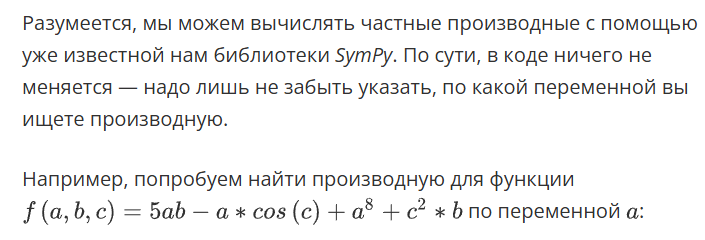

In [2]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b
print(diff(f, a))

8*a**7 + 5*b - cos(c)


### Задание 2.2
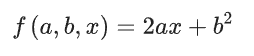

In [4]:
from sympy import symbols, cos, diff

a, b, x = symbols('a b x', real=True)
f = 2*a*x + b**2
print(diff(f, a))
print(diff(f, a, 2))

2*x
0


### Задание 2.4
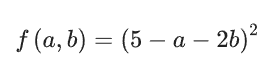

In [6]:
from sympy import symbols, cos, diff

a, b, x = symbols('a b x', real=True)
f_1 = (5-a-2*b)**2
f_2 = (a+2*b-5)**2
print(diff(f_1, a))
print(diff(f_1, b))
print(diff(f_2, a))
print(diff(f_2, b))

2*a + 4*b - 10
4*a + 8*b - 20
2*a + 4*b - 10
4*a + 8*b - 20


### Задание 2.6
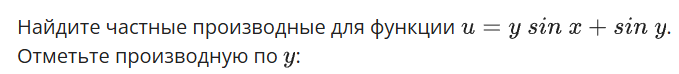

In [7]:
from sympy import symbols, sin, diff

x, y = symbols('x y', real=True)
f = y*sin(x)+sin(y)
print(diff(f, x))
print(diff(f, y))

y*cos(x)
sin(x) + cos(y)


## Безусловные экстремумы. Функции нескольких перменных

### Задание 3.2
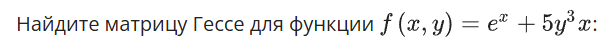

In [12]:
from sympy import symbols, diff, exp

x, y = symbols('x y', real=True)
f =  exp(x) + 5*y**3*x
print(diff(f, x, 2))
print(diff(f, x, y))
print(diff(f, y, x))
print(diff(f, y, 2))


exp(x)
15*y**2
15*y**2
30*x*y


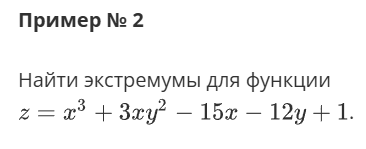

In [16]:
#Решим уравнение и найдем стационарные точки
from sympy import *

x, y = symbols('x, y')

z = x**3 + 3*x*y**2 - 15*x - 12*y + 1
z_diff_x = diff(z, x)
z_diff_y = diff(z, y)
display(z_diff_x, z_diff_y)

eq1 = Eq(3*x**2 + 3*y**2 - 15, 0)
eq2 = Eq(6*x*y - 12, 0)

sol = solve([eq1, eq2], [x, y])
print(sol)


3*x**2 + 3*y**2 - 15

6*x*y - 12

[(-2, -1), (-1, -2), (1, 2), (2, 1)]


### Задание 3.9
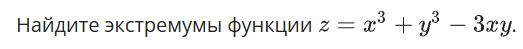

In [20]:
from sympy import *

x, y = symbols('x, y')

z = x**3 + y**3 - 3*x*y
z_diff_x = diff(z, x)
z_diff_y = diff(z, y)
display(z_diff_x, z_diff_y)

eq1 = Eq(3*x**2 - 3*y, 0)
eq2 = Eq(-3*x+3*y**2, 0)

sol = solve([eq1, eq2], [x, y])
print(sol)

z_diff_xx = diff(z, x, x)
z_diff_xy = diff(z, x, y)
z_diff_yy = diff(z, y, y)
display(z_diff_xx, z_diff_xy, z_diff_yy)


3*x**2 - 3*y

-3*x + 3*y**2

[(0, 0), (1, 1), ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2), ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]


6*x

-3

6*y

## Введение в оптимизацию

### Практика на Python

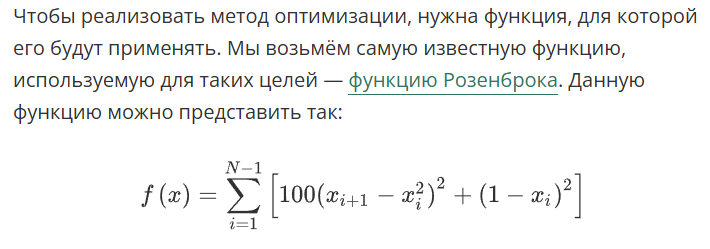

In [21]:
#Определим данную функцию
import numpy as np

def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

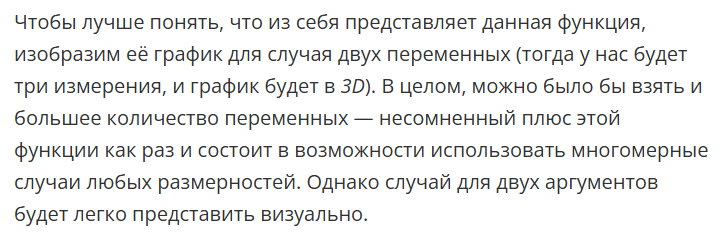

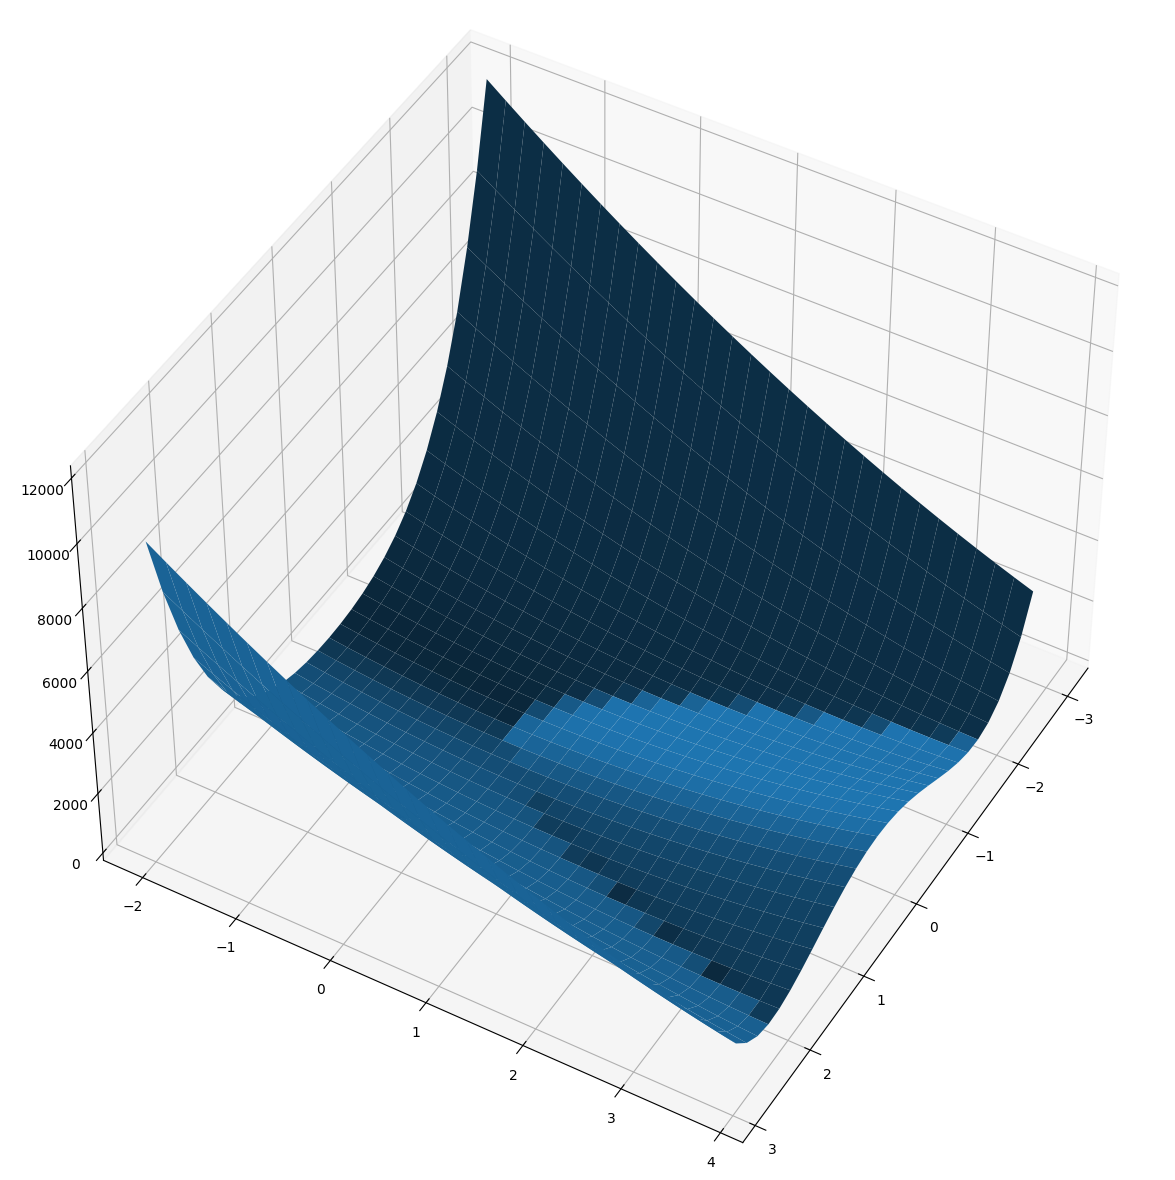

In [23]:
import matplotlib.pyplot as plt

graph = plt.figure(figsize=[25,15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1, x2]))
surf = ax.plot_surface(x1, x2, y)

plt.show()

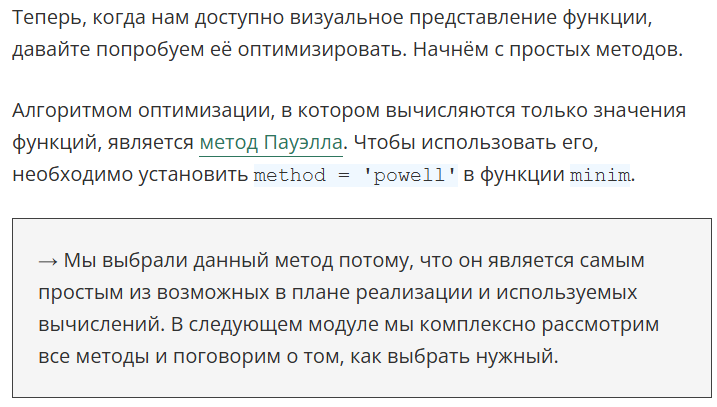

In [24]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


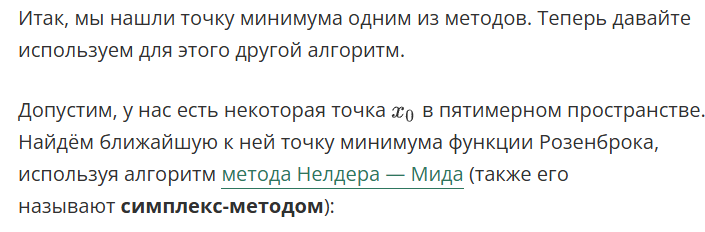

In [25]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


### Задание 4.5
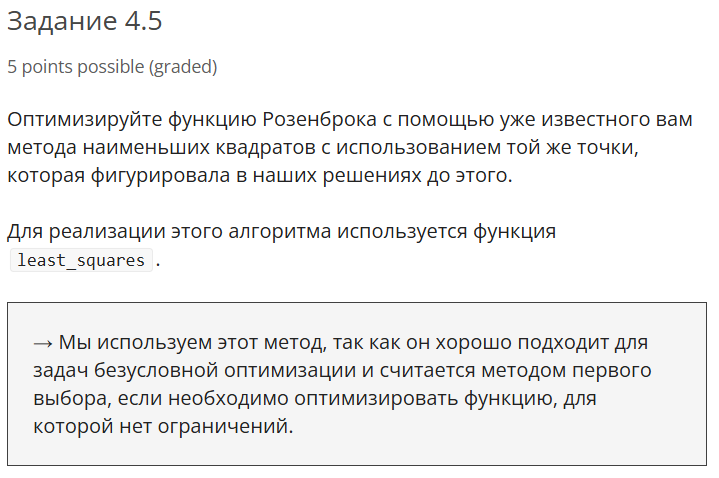

In [34]:
from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = least_squares(func_rosen, x1)
print(result_point.x.round(3))

[0.939 0.882 0.776 0.603 0.361]


## Условные экстремумы. Метод Лагранжа

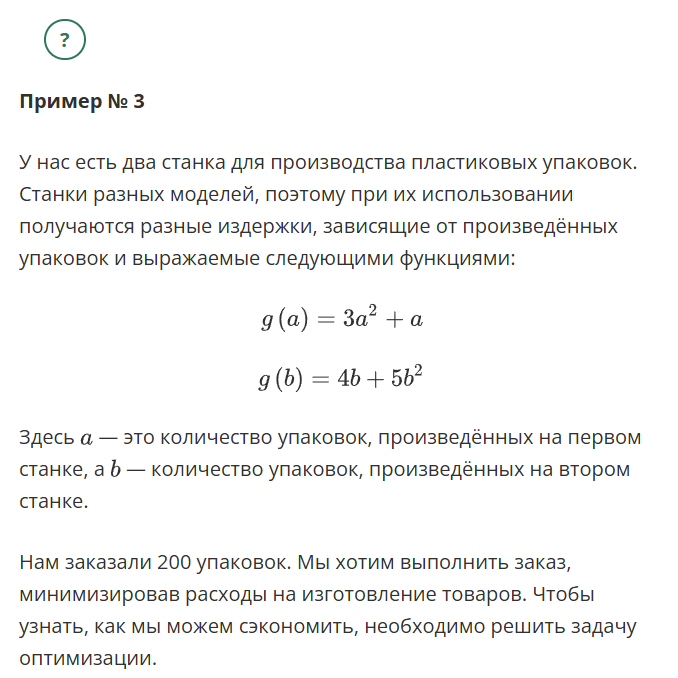

In [42]:
from sympy import *

a,b,w = symbols('a b w')
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b: \n f = ', g)

q = a + b - 200
print('Функция ограничений: ', q, '= 0')

f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ', f)

fa = f.diff(a)
print('df/da =', fa, '= 0')
fb = f.diff(b)
print('df/db =', fb, '= 0')
fw = f.diff(w)
print('df/dw =', fw, '= 0')

sols = solve([fa,fb,fw], a,b,w)
print('Стационарная точка M(x,y):\n', float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b: 
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


Также отметим, что мы говорим здесь о целых предметах (упаковках), поэтому при использовании этого решения в реальной жизни мы округлили бы значения до ближайших целых.

In [44]:
print('Стационарная точка M(x,y):\n', round(float(sols[a])),',',round(float(sols[b])))

Стационарная точка M(x,y):
 125 , 75


### Задание 5.3
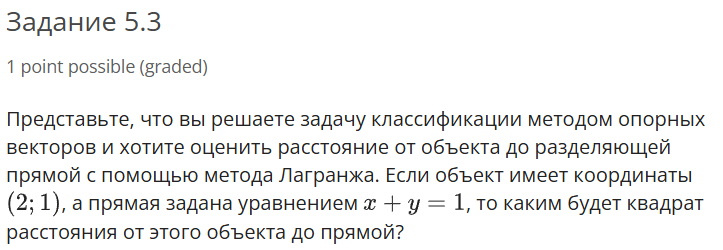

In [ ]:
from sympy import *

x,y,w = symbols('x y w')
g = ((x-2)**2+(y-1)**2)**(0.5)
print('Целевая функция для аргументов x и y: \n f = ', g)

q = x + y - 1
print('Функция ограничений: ', q, '= 0')

f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
print('Функция Лагранжа :\n ', f)

fx = f.diff(x)
print('df/dx =', fx, '= 0')
fy = f.diff(y)
print('df/dy =', fy, '= 0')
fw = f.diff(w)
print('df/dw =', fw, '= 0')

sols = solve([fx,fy,fw], x,y,w)
print(sols)



Целевая функция для аргументов x и y: 
 f =  ((x - 2)**2 + (y - 1)**2)**0.5
Функция ограничений:  x + y - 1 = 0
Функция Лагранжа :
  w*(x + y - 1) + ((x - 2)**2 + (y - 1)**2)**0.5
df/dx = w + (1.0*x - 2.0)/((x - 2)**2 + (y - 1)**2)**0.5 = 0
df/dy = w + (1.0*y - 1.0)/((x - 2)**2 + (y - 1)**2)**0.5 = 0
df/dw = x + y - 1 = 0
[(1.00000000000000, 0.0, 0.707106781186548)]


### Задание 5.4
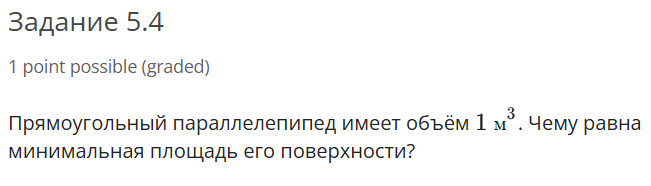

In [54]:
from sympy import *

a,b,c,w = symbols('a b c w')
g = 2*(a*b + b*c + a*c)
print('Целевая функция для аргументов a b c: \n f = ', g)

q = a*b*c - 1
print('Функция ограничений: ', q, '= 0')

f = 2*(a*b + b*c + a*c) + w*(a*b*c - 1)
print('Функция Лагранжа :\n ', f)

fa = f.diff(a)
print('df/da =', fa, '= 0')
fb = f.diff(b)
print('df/db =', fb, '= 0')
fc = f.diff(c)
print('df/dc =', fc, '= 0')
fw = f.diff(w)
print('df/dw =', fw, '= 0')

sols = solve([fa,fb,fc,fw], a,b,c,w)
print(sols)

Целевая функция для аргументов a b c: 
 f =  2*a*b + 2*a*c + 2*b*c
Функция ограничений:  a*b*c - 1 = 0
Функция Лагранжа :
  2*a*b + 2*a*c + 2*b*c + w*(a*b*c - 1)
df/da = b*c*w + 2*b + 2*c = 0
df/db = a*c*w + 2*a + 2*c = 0
df/dc = a*b*w + 2*a + 2*b = 0
df/dw = a*b*c - 1 = 0
[(1, 1, 1, -4), (-1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, -1/2 - sqrt(3)*I/2, 2 - 2*sqrt(3)*I), (-1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, 2 + 2*sqrt(3)*I)]


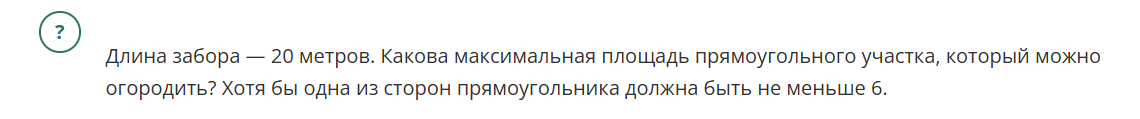

In [57]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

#Подключаем аккуратный вывод формул
init_printing()

#Создаем переменные
x1, x2, x1_tilde, lambda1, lambda2= symbols('x_1 x_2 xtilde_2 \lambda_1 \lambda_2', real=True)

#Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

#Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1, x2, x1_tilde, lambda1, lambda2
)
print(solution)

[(6, 4, 0, 6, 2)]


## Градиент и антиградиент

### Вычисление градиента для числовых векторов в Python
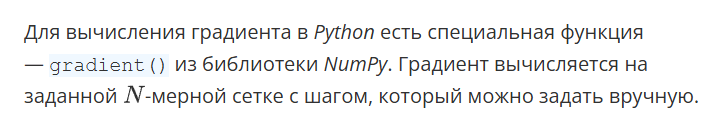
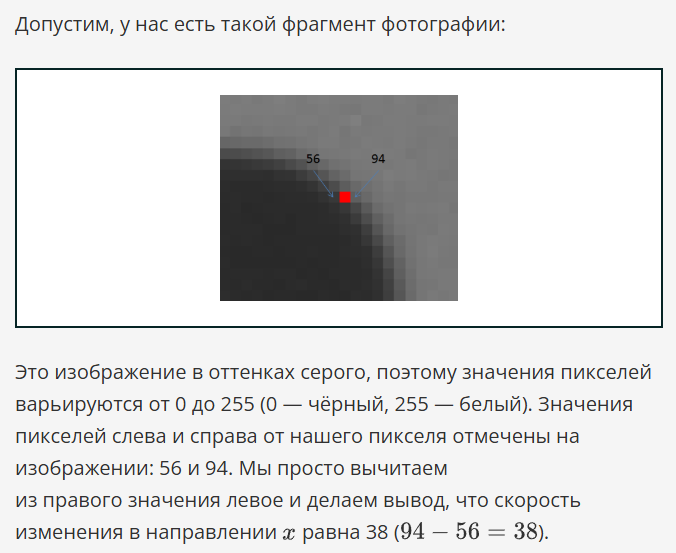
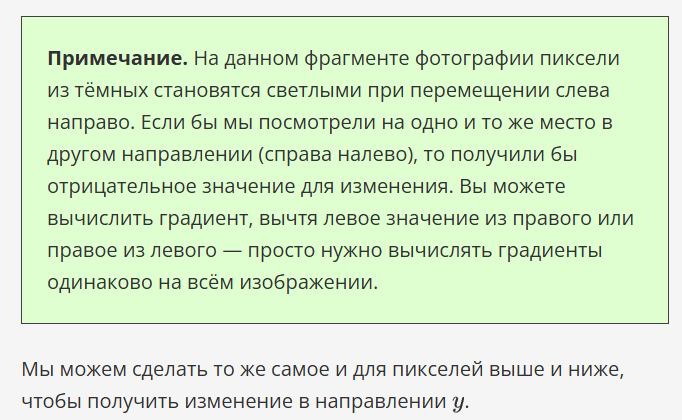

Итак, перейдём к примеру вычислений. Для работы с градиентом импортируем хорошо известную нам библиотеку NumPy:

In [58]:
import numpy as np

Зададим массив, для которого хотим найти градиент, и вычислим его:

In [59]:
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
np.gradient(f)

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора мы получаем обычную разность для соседних элементов массива:

In [62]:
print('(',f[1] - f[0], f[-1] - f[-2],')')

( 4.0 11.0 )


А вот внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2:

In [64]:
print((f[2] - f[0])/2)
print((f[3] - f[1])/2)
print((f[4] - f[2])/2)
print((f[5] - f[3])/2)

5.5
8.0
11.0
12.0


Шаг можно варьировать. При его изменении вычисления реализуются так же, но деление происходит на величину обычного шага у края и удвоенную величину шага для элементов внутри вектора:

In [65]:
np.gradient(f, 2)

array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

In [66]:
for i in range(1, len(f)-1):
    print((f[i+1] - f[i-1])/(2*2))

2.75
4.0
5.5
6.0


### Задание 6.6
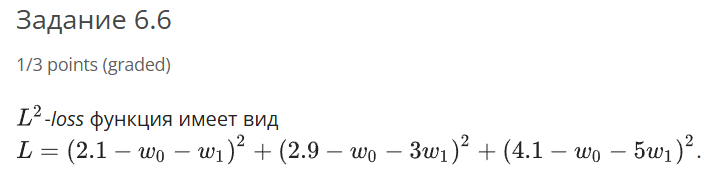

In [80]:
from sympy import symbols, diff, Eq

x,y = symbols('x y')

L = (2.1-x-y)**2 + (2.9-x-3*y)**2 + (4.1-x-5*y)**2

L_x = diff(L, x)
L_y = diff(L, y)
display(L_x, L_y)

eqL = Eq(L, 0)
solL = solve(eqL, [x,y])
display(solL)

eq1 = Eq(L_x, 0)
eq2 = Eq(L_y, 0)

sol = solve([eq1, eq2], [x, y])
display(sol)


### Задание 6.7
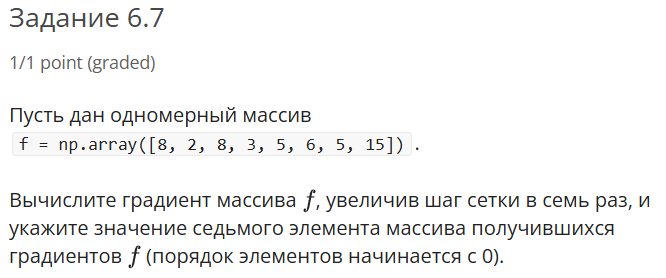

In [84]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
grad_f = np.gradient(f, 7)
print(grad_f)
print(grad_f[7])

[-0.85714286  0.          0.07142857 -0.21428571  0.21428571  0.
  0.64285714  1.42857143]
1.4285714285714286
